In this notebook, we check that samples from the noise model resemble real noise samples.

In [1]:
import sys

import torch
import numpy as np

sys.path.append('../')
from noise_model.PixelCNN import PixelCNN
from utils.tools import autocorrelation, plot

In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

Load trained noise model.</br>
To replicate our experiments, we must choose an attenuation level. In this example, we choose attenuation level 2.0.

In [3]:
noise_model_location = f"../nm_checkpoint/final_params.ckpt"
noise_model = PixelCNN.load_from_checkpoint(noise_model_location).eval().to(device)

Load real noise samples

In [4]:
at_pbs_location = f"../data/PBS.npy"
at_pbs = np.load(at_pbs_location)

# For our data, the scattering channel is the second
at_pbs = at_pbs[:, 1]
# We reshape it to fit pytorch's conventional input shape
at_pbs = at_pbs.reshape((40000, 1, 1000))

# The mean of noise should be zero, otherwise the denoiser will shift the data
at_pbs = at_pbs - np.mean(at_pbs)

Set sample shape and sample from noise model.
Move sample to cpu and convert to numpy array

In [5]:
# In this example, we'll take one sample
n = 1
sample_shape = [n, *at_pbs.shape[-1:]]
sample = noise_model.sample(sample_shape).detach().cpu().numpy()

100%|██████████| 1000/1000 [00:16<00:00, 60.74it/s]


Visually compare real noise against noise model sample.

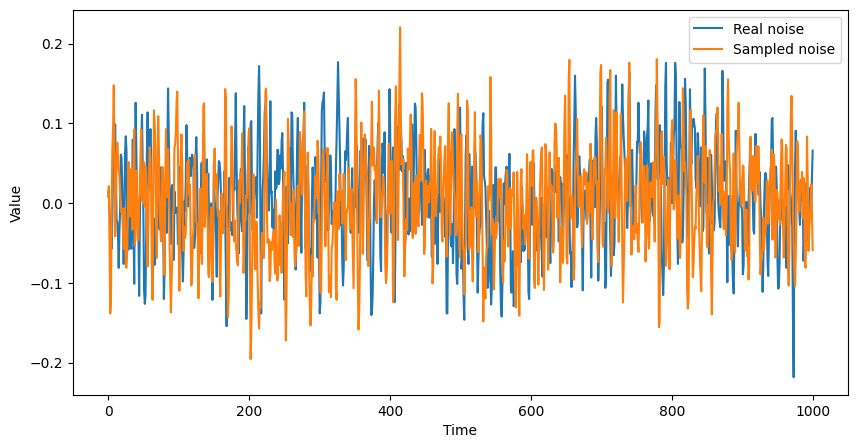

In [6]:
plot([at_pbs[0], sample[0]], ["Real noise", "Sampled noise"])

Show autocorrelation of real noise then the noise model sample

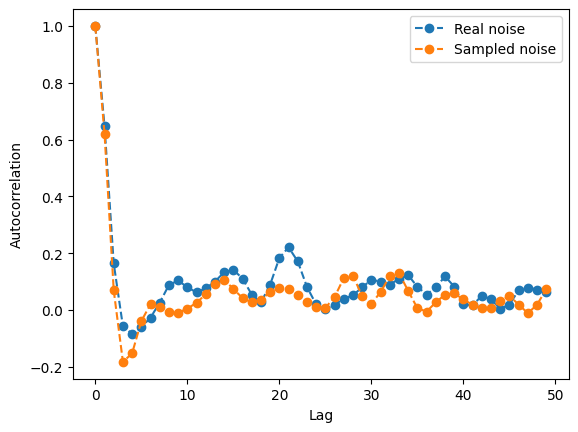

In [7]:
autocorrelation([at_pbs[:1], sample], max_lag=50, titles=["Real noise", "Sampled noise"])

If either the visual inspection or the autocorrelation plots show significant differences between the real and sampled noise, the training hyperparameters of the noise model need to be tuned. See 1-train_noise_model.ipynb for suggestions.